In [1]:
#import libraries
import imdlib as imd
import geopandas as gpd
import regionmask
import numpy as np
import pandas as pd
import rioxarray as rio

In [15]:
#Download IMD grided rainfall data
start_dy = '2019-01'
end_dy = '2020-07'
var_type = 'rain'
file_dir='C:/Users/DELL/Desktop/RMSI_test/rain'
data = imd.get_real_data(var_type, start_dy, end_dy, file_dir)


Downloading: rain for date 2019-01-01
Downloading: rain for date 2019-01-02
Downloading: rain for date 2019-01-03
Downloading: rain for date 2019-01-04
Downloading: rain for date 2019-01-05


KeyboardInterrupt: 

In [4]:
#read and check the data
data = imd.open_real_data(var_type, start_dy, end_dy, file_dir)

ds = data.get_xarray()
print(ds)
#data.to_geotiff('test.tif', file_dir)

<xarray.Dataset>
Dimensions:  (time: 30, lat: 129, lon: 135)
Coordinates:
  * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
  * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
  * time     (time) datetime64[ns] 2022-06-01 2022-06-02 ... 2022-06-30
Data variables:
    rain     (time, lat, lon) float64 -999.0 -999.0 -999.0 ... -999.0 -999.0
Attributes:
    Conventions:  CF-1.7
    title:        IMD gridded data
    source:       https://imdpune.gov.in/
    history:      2023-05-16 01:33:53.682691 Python
    references:   
    comment:      
    crs:          epsg:4326


In [5]:
#plotting the data
ds = ds.where(ds['rain'] != -999.) #Remove NaN values
#dss=ds['rain'].max('time').plot()
for i in range(30):

    ds2d = ds['rain'].isel(time=i)
    ds2d.rio.to_raster(str(ds['time'][i])[36:46] + "_rain.tif")

    


In [65]:
for i in range(30):
    date= ds['time'][i]
    print(date)

<xarray.DataArray 'time' ()>
array('2022-06-01T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2022-06-01
Attributes:
    standard_name:  time
    long_name:      time
<xarray.DataArray 'time' ()>
array('2022-06-02T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2022-06-02
Attributes:
    standard_name:  time
    long_name:      time
<xarray.DataArray 'time' ()>
array('2022-06-03T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2022-06-03
Attributes:
    standard_name:  time
    long_name:      time
<xarray.DataArray 'time' ()>
array('2022-06-04T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2022-06-04
Attributes:
    standard_name:  time
    long_name:      time
<xarray.DataArray 'time' ()>
array('2022-06-05T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2022-06-05
Attributes:
    standard_name:  

In [74]:
str(ds['time'][i])[36:46]


'2022-06-30'

In [24]:
pip install rioxarray

     -------------------------------------- 53.5/53.5 kB 251.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [15]:
#import the India state boundary shapefile
state_boun = gpd.read_file("C:/Users/DELL/Desktop/RMSI_test/india_state/indstate/stateboundary.zip")
state_boun["State_Name"]


0     Andaman & Nicobar
1            Chandigarh
2         Daman and Diu
3                 Delhi
4               Haryana
5             Jharkhand
6             Karnataka
7                Kerala
8           Lakshadweep
9        Madhya Pradesh
10          Maharashtra
11               Odisha
12           Puducherry
13            Tamilnadu
14        Chhattishgarh
15            Telengana
16       Andhra Pradesh
17                  Goa
18     Himachal Pradesh
19               Punjab
20            Rajasthan
21              Gujarat
22          Uttarakhand
23        Uttar Pradesh
24               Sikkim
25                Assam
26    Arunachal Pradesh
27             Nagaland
28              Manipur
29              Mizoram
30              Tripura
31            Meghalaya
32          West Bengal
33                Bihar
34               Ladakh
35    Jammu and Kashmir
Name: State_Name, dtype: object

In [16]:
# mask the rainfall data statewise
state_mask = regionmask.mask_3D_geopandas(state_boun,
                                         ds.lon,
                                         ds.lat)
state_mask

rain_state_boun_mask = ds["rain"].where(state_mask)

rain_state_boun_mask

<xarray.DataArray 'rain' (time: 30, lat: 129, lon: 135, region: 35)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
...
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]])
Coordinates:
  * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
  * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
  * time     (time) datetime64[ns] 2022-06-01 2022-06-02 ... 2022-06-30
  * region   (region) int32 0 1 2 3 4 5 6 7 9 10 ... 27 28 29 30 31 32 33 34 35
Attributes:
    units:      mm/day
    long_name:  Rainfall

In [17]:
#extract the maximum rain fall
dff=rain_state_boun_mask.groupby("region").max(["time","lat", "lon"]).to_dataframe()

In [18]:
#Add the maximum rainfall to the state boundary shapefile
gdf = state_boun.assign(Max_Rain=dff['rain'])
gdf


,State_Name,geometry,Max_Rain
0,Andaman & Nicobar,"MULTIPOLYGON (((92.90124 12.91071, 92.90157 12...",NaN
1,Chandigarh,"POLYGON ((76.77232 30.79420, 76.77286 30.79343...",29.385704
2,Daman and Diu,"MULTIPOLYGON (((72.96339 20.33227, 72.96390 20...",46.903553
3,Delhi,"POLYGON ((77.10591 28.87005, 77.10668 28.86989...",9.536147
4,Haryana,"POLYGON ((76.57526 30.10063, 76.57645 30.10152...",42.686214
5,Jharkhand,"POLYGON ((87.69613 24.16027, 87.69625 24.15974...",65.557770
6,Karnataka,"MULTIPOLYGON (((77.33232 18.45086, 77.33267 18...",127.614471
7,Kerala,"POLYGON ((74.98896 12.79553, 74.98953 12.79554...",72.000000
8,Lakshadweep,"MULTIPOLYGON (((73.08025 8.32651, 73.08029 8.3...",NaN
9,Madhya Pradesh,"POLYGON ((78.37211 26.86406, 78.37423 26.86091...",131.190445


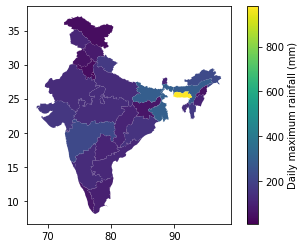

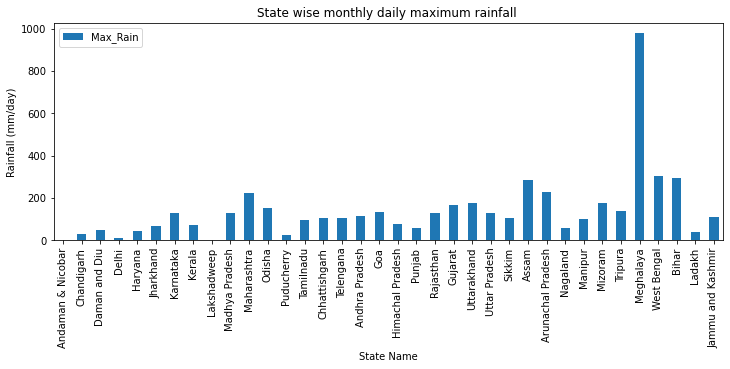

In [34]:
#plot the maximum daily rainfall state wise

map1=gdf.plot(column='Max_Rain', legend=True, legend_kwds={'label': "Daily maximum rainfall (mm)",
                        'orientation': "vertical"}).get_figure().savefig('C:/Users/DELL/Desktop/RMSI_test/Ind_stat_rain.png', bbox_inches='tight', dpi=300)

gdf.plot.bar(x='State_Name', y='Max_Rain', rot=90, figsize= [12,4], ylabel= 'Rainfall (mm/day)', xlabel='State Name', title='State wise monthly daily maximum rainfall ').get_figure().savefig('C:/Users/DELL/Desktop/RMSI_test/stat_rain.png', bbox_inches='tight', dpi=300)